# Diabetes

Link to the data : https://www.kaggle.com/mathchi/diabetes-data-set

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective is to predict based on diagnostic measurements whether a patient has diabetes.

Content
Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- BloodPressure: Diastolic blood pressure (mm Hg)
- SkinThickness: Triceps skin fold thickness (mm)
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2)
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1)

This description was extracted from : https://www.kaggle.com/mathchi/diabetes-data-set

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the Data

In [61]:
diab = pd.read_csv("diabetes.csv")

In [62]:
diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [63]:
diab.shape

(768, 9)

The dataset describes 768 patients using 8 variables, their diagnosis is also specified in the `Outcome` variable (diabetic person/non diabetic person)

## Missing Values

In [64]:
diab.isna().sum(axis=0)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [65]:
(diab==0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

We can see that the dataset doesn't contain any missing values represented by NaN values. But if we look closely, we can see that some people have a BMI equal to 0 which is not logical. In addition, some people have Glucose levels,  and BloodPressure equal to 0, which is also not logical, we will impute these values then proceed to the next step.

In [66]:
diab = diab[diab["Glucose"]!=0]
diab = diab[diab["BloodPressure"]!=0]
diab = diab[diab["BMI"]!=0]

In [67]:
diab.shape

(724, 9)

We can see that we're kept with 724 patients with valid measurements. 44 patients have been deleted from the dataset due to the inconsistency in their measurements.

## Dividing class and explicative variables

In [68]:
X = diab.drop(columns=["Outcome"])
y = diab["Outcome"]

## Univariate Analysis

In [69]:
diab.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can see that the variables are not on the same scale and may require normalization for certain methods to perform better.

### Histograms

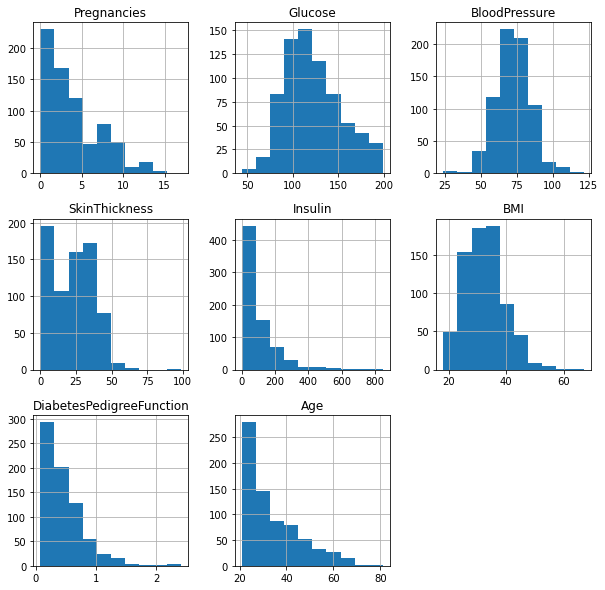

In [70]:
X.hist(figsize=(10,10));

We can see that some variables are normally distributed, such as `Glucose`, `BloodPressure`, and `Age`. In the other hand, the others seem to be exponentially distributed, applying a `log` transformation to these may make the data normal if we want to apply methods that work better on normal data. You can see in the next figure the effect of applying a `log(1+x)` transformation.

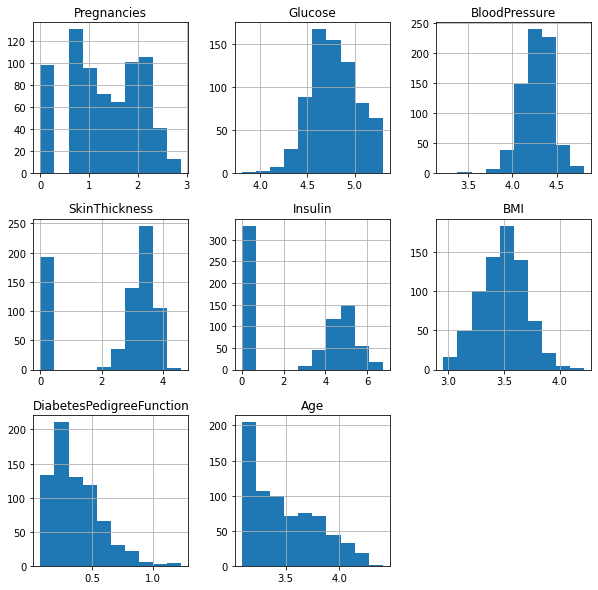

In [71]:
np.log(1+X).hist(figsize=(10,10));

### Barplots

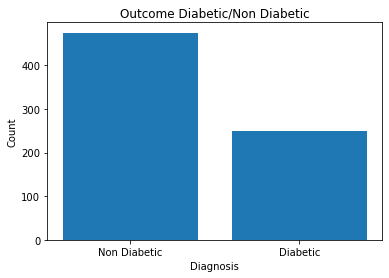

In [72]:
counts = y.value_counts()
plt.bar(pd.Series(counts.index).replace({0:"Non Diabetic", 1:"Diabetic"}), counts)
plt.title("Outcome Diabetic/Non Diabetic")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

We can see that we have about twice as much Non Diabetic persons as Diabetic ones. This may require resampling the data.

## Multivariate Analysis

### Correlation matrix

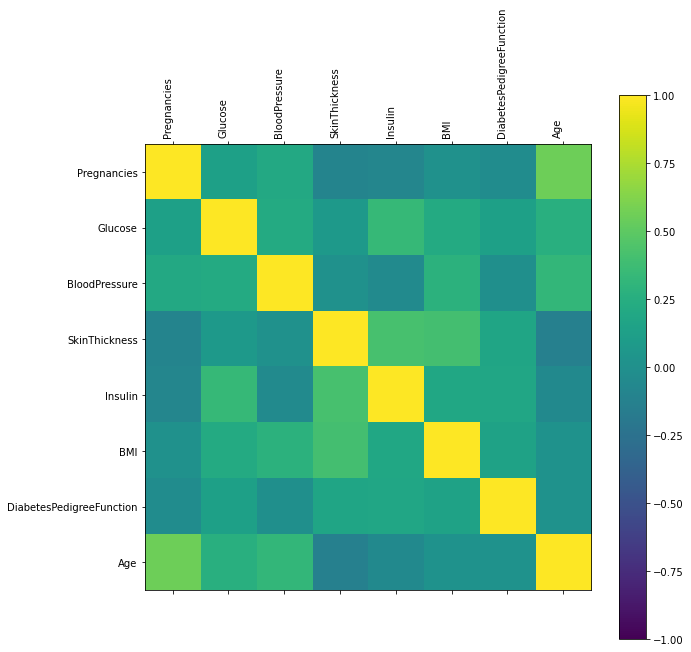

In [73]:
import matplotlib.pyplot as plt
correlation = X.corr()
fig, ax = plt.subplots(figsize=(10,10))
cax = ax.matshow(correlation, vmin=-1, vmax=1, interpolation='none')
fig.colorbar(cax)
ax.set_xticks([x for x in range(len(X.columns))])
ax.set_xticklabels(X.columns, rotation=90, horizontalalignment='right')

ax.set_yticks([x for x in range(len(X.columns))])
ax.set_yticklabels(X.columns)

plt.show()

We can see here that the age is significantly correlated with the number of pregnancies, which is very logical. Otherwise, the data doesn't seem to show any strong correlations between variables.

### Analyzing according to Diagnosis

In [89]:
diabetics = diab[diab["Outcome"] == 1]
nondiabetics = diab[diab["Outcome"] == 0]

In [131]:
import plotly.graph_objects as go

for col in diabetics:
    if col=="Outcome":
        break
    fig = go.Figure()
    for label, df in [("Non Diabetic",nondiabetics), ("Diabetic", diabetics)]:
        fig.add_trace(go.Box(y=df[col].values, name=label))

    fig.update_layout(
        title=col + " Boxplots Grouped by Diagnosis",
        yaxis_title= col,
        xaxis_title="Diagnosis",
        width=900,
        height=500
    )
    fig.show()

## Visualizing the data

### Using TSNE
#### Not Normalized TSNE

In [78]:
from sklearn.manifold import TSNE
restsne = TSNE(n_components=2).fit_transform(X)

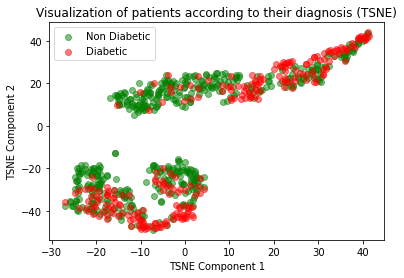

In [83]:
restsnedf = pd.DataFrame(restsne, index=diab.index)
plt.scatter(restsnedf[diab["Outcome"]==0].iloc[:,0], restsnedf[diab["Outcome"]==0].iloc[:,1], c="green",alpha=0.5, label="Non Diabetic")
plt.scatter(restsnedf[diab["Outcome"]==1].iloc[:,0], restsnedf[diab["Outcome"]==1].iloc[:,1], c="red",alpha=0.5, label="Diabetic")

plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.title("Visualization of patients according to their diagnosis (TSNE)")
plt.legend()
plt.show()

#### Normalized TSNE

In [142]:
normed_X = (X-X.mean())/X.std()
restsne = TSNE(n_components=2).fit_transform(normed_X)

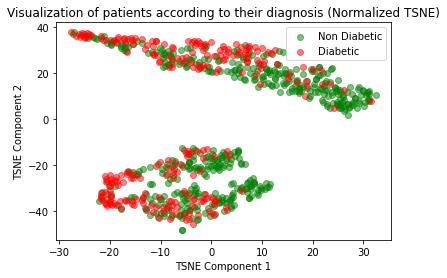

In [144]:
restsnedf = pd.DataFrame(restsne, index=diab.index)
plt.scatter(restsnedf[diab["Outcome"]==0].iloc[:,0], restsnedf[diab["Outcome"]==0].iloc[:,1], c="green",alpha=0.5, label="Non Diabetic")
plt.scatter(restsnedf[diab["Outcome"]==1].iloc[:,0], restsnedf[diab["Outcome"]==1].iloc[:,1], c="red",alpha=0.5, label="Diabetic")

plt.xlabel("TSNE Component 1")
plt.ylabel("TSNE Component 2")
plt.title("Visualization of patients according to their diagnosis (Normalized TSNE)")
plt.legend()
plt.show()

### Using PCA
#### Not Normalized PCA

In [84]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
respca = pca.fit_transform(X)

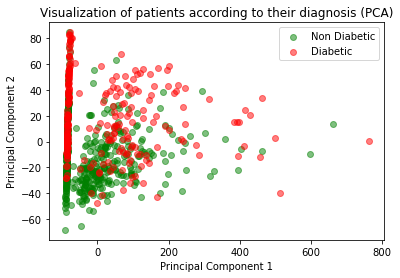

In [85]:
respcadf = pd.DataFrame(respca, index=diab.index)
plt.scatter(respcadf[diab["Outcome"]==0].iloc[:,0], respcadf[diab["Outcome"]==0].iloc[:,1], c="green",alpha=0.5, label="Non Diabetic")
plt.scatter(respcadf[diab["Outcome"]==1].iloc[:,0], respcadf[diab["Outcome"]==1].iloc[:,1], c="red",alpha=0.5, label="Diabetic")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualization of patients according to their diagnosis (PCA)")
plt.legend()
plt.show()

We can see here that diabetic patients are regrouped together, same goes for non diabetic patients. So there are patterns to learn in this data, and we'll do that in the next steps.

#### Normalized PCA

In [139]:
pca = PCA(n_components=2)
normed_X = (X-X.mean())/X.std()
respca = pca.fit_transform(normed_X)

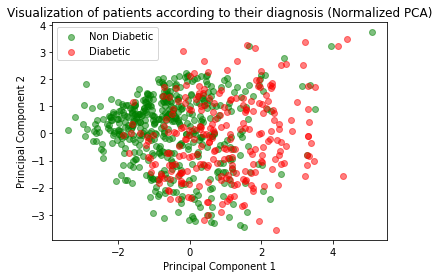

In [141]:
respcadf = pd.DataFrame(respca, index=diab.index)
plt.scatter(respcadf[diab["Outcome"]==0].iloc[:,0], respcadf[diab["Outcome"]==0].iloc[:,1], c="green",alpha=0.5, label="Non Diabetic")
plt.scatter(respcadf[diab["Outcome"]==1].iloc[:,0], respcadf[diab["Outcome"]==1].iloc[:,1], c="red",alpha=0.5, label="Diabetic")

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Visualization of patients according to their diagnosis (Normalized PCA)")
plt.legend()
plt.show()

### 2 by 2 plots

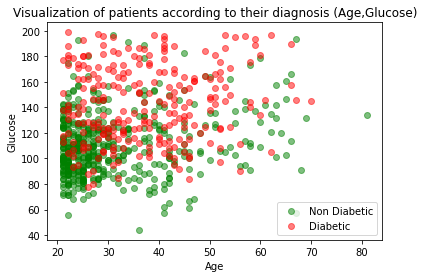

In [86]:
varX = "Age"
varY = "Glucose"
plt.scatter(diab[diab["Outcome"]==0][varX], diab[diab["Outcome"]==0][varY], c="green",alpha=0.5, label="Non Diabetic")
plt.scatter(diab[diab["Outcome"]==1][varX], diab[diab["Outcome"]==1][varY], c="red",alpha=0.5, label="Diabetic")

plt.xlabel(varX)
plt.ylabel(varY)
plt.title("Visualization of patients according to their diagnosis ("+varX+","+varY+")")
plt.legend()
plt.show()

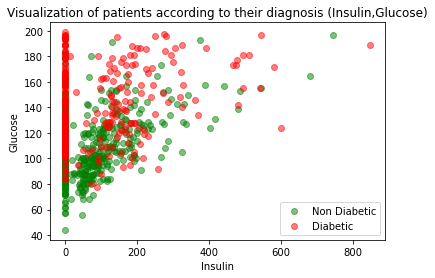

In [87]:
varX = "Insulin"
varY = "Glucose"
plt.scatter(diab[diab["Outcome"]==0][varX], diab[diab["Outcome"]==0][varY], c="green",alpha=0.5, label="Non Diabetic")
plt.scatter(diab[diab["Outcome"]==1][varX], diab[diab["Outcome"]==1][varY], c="red",alpha=0.5, label="Diabetic")

plt.xlabel(varX)
plt.ylabel(varY)
plt.title("Visualization of patients according to their diagnosis ("+varX+","+varY+")")
plt.legend()
plt.show()

We can see in the Insulin/Glucose graph that some patients are aligned in line corresponding to 0 Insulin and variable Glucose levels. We can see that higher Glucose levels correspond to Diabetic people and lower ones to Non Diabetic people.

This structure can be explained by the fact that Type 1 Diabetics have no insulin secreted, which causes the Glucose levels to skyrocket.

On the other hand, Type 2 diabetics tend to have a high level of insulin with high Glucose levels, this is caused by their Insulino Resistance. We can see these represented in the up right red cloud of points.

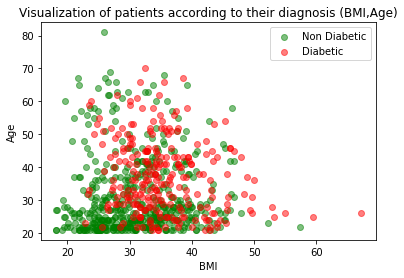

In [88]:
varX = "BMI"
varY = "Age"
plt.scatter(diab[diab["Outcome"]==0][varX], diab[diab["Outcome"]==0][varY], c="green",alpha=0.5, label="Non Diabetic")
plt.scatter(diab[diab["Outcome"]==1][varX], diab[diab["Outcome"]==1][varY], c="red",alpha=0.5, label="Diabetic")

plt.xlabel(varX)
plt.ylabel(varY)
plt.title("Visualization of patients according to their diagnosis ("+varX+","+varY+")")
plt.legend()
plt.show()

We can see in this graph that obse people (People with a higher BMI), are more likely to have Diabetes than the others.

## Constructing the Model (Without Normalization)

In [145]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc, recall_score, precision_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [135]:
from sklearn.model_selection import train_test_split
test_part = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_part)

### SMOTE Upsampling
As the classes are imbalanced, we apply smote to rebalance the data.

In [136]:
from imblearn.over_sampling import SMOTE
s = SMOTE()
X_train_smote, y_train_smote = s.fit_resample(X_train, y_train)

### Model Selection

#### Cross Validation with F1 Score

In [146]:
num_folds = 10
seed = 7
scoring = 'f1'
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM_LIN', SVC(kernel="linear", probability=True)))
models.append(('SVM_POLY', SVC(kernel="poly", probability=True)))
models.append(('SVM_RBF', SVC(kernel="rbf", probability=True)))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=100)))
models.append(('MLP(ANN)', MLPClassifier(max_iter=300)))
models.append(('GBoost', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=True)
	cv_results = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.714620 (0.058868)
LDA: 0.720090 (0.066062)
QDA: 0.657696 (0.060171)
KNN: 0.756638 (0.056489)
CART: 0.757978 (0.043330)
RF: 0.831506 (0.036254)
NB: 0.678102 (0.059766)
SVM_LIN: 0.726206 (0.100244)
SVM_POLY: 0.681397 (0.058641)
SVM_RBF: 0.710143 (0.049936)
AdaBoost: 0.743577 (0.059424)
MLP(ANN): 0.719161 (0.050094)
GBoost: 0.768607 (0.060442)


#### Cross Validation with Accuracy

In [148]:
results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=True)
	cv_results = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring="accuracy")
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.741746 (0.065603)
LDA: 0.738919 (0.034985)
QDA: 0.701425 (0.071718)
KNN: 0.726775 (0.015248)
CART: 0.749322 (0.031488)
RF: 0.807757 (0.045233)
NB: 0.713252 (0.057635)
SVM_LIN: 0.740389 (0.043316)
SVM_POLY: 0.711624 (0.045865)
SVM_RBF: 0.713275 (0.062513)
AdaBoost: 0.762641 (0.059634)
MLP(ANN): 0.695206 (0.062287)
GBoost: 0.756694 (0.054522)


According to the CV F1 Score and Accuracies that we have computed, we can say that the best performing model is Random Forest. Nonetheless, proper parameter tuning could turn the tables in favour of another method.

### Training
Among all the algorithms, Random Forest performs the best without trying some tuning on other methods. Normally we'd choose a bunch of models and fine tune them to see which performs best, but in our case for testing purposes, we'll train all of the models and compare their results.

In [151]:
import time
print("|Algorithm   |Exec. Time   |")
for name, model in models:
    START_TIME = time.time()
    model.fit(X_train_smote, y_train_smote)
    END_TIME = time.time()
    print("| {:10} | {:10.4f}s |".format(name, END_TIME-START_TIME))


|Algorithm   |Exec. Time   |
| LR         |     0.0549s |
| LDA        |     0.0050s |
| QDA        |     0.0050s |
| KNN        |     0.0050s |
| CART       |     0.0070s |
| RF         |     0.2973s |
| NB         |     0.0030s |
| SVM_LIN    |    19.9060s |
| SVM_POLY   |     0.1130s |
| SVM_RBF    |     0.1471s |
| AdaBoost   |     0.2583s |
| MLP(ANN)   |     0.6233s |
| GBoost     |     0.1097s |


We can see that among all the models, Linear SVM took the most time (19 seconds), followed by Neural Nets (MLP), then Random Forest.

|Algorithme  |Accuracy    |FScore  |AUPRC   |
| LR         |      75.69 | 0.7450 | 0.6381 | 0.7763 | 0.6211  |
| LDA        |      75.69 | 0.7439 | 0.6301 | 0.7632 | 0.6237  |
| QDA        |      75.69 | 0.7390 | 0.6303 | 0.7105 | 0.6353  |
| KNN        |      66.06 | 0.6461 | 0.5581 | 0.6579 | 0.5102  |
| CART       |      73.39 | 0.7053 | 0.6822 | 0.6053 | 0.6216  |
| RF         |      76.15 | 0.7390 | 0.6890 | 0.6711 | 0.6538  |
| NB         |      77.98 | 0.7630 | 0.6350 | 0.7368 | 0.6667  |
| SVM_LIN    |      75.23 | 0.7385 | 0.6292 | 0.7500 | 0.6196  |
| SVM_POLY   |      74.31 | 0.7117 | 0.6308 | 0.5921 | 0.6429  |
| SVM_RBF    |      69.72 | 0.6790 | 0.6128 | 0.6579 | 0.5556  |
| AdaBoost   |      77.52 | 0.7599 | 0.7232 | 0.7500 | 0.6552  |
| MLP(ANN)   |      65.14 | 0.6437 | 0.4716 | 0.7237 | 0.5000  |
| GBoost     |      78.90 | 0.7741 | 0.7432 | 0.7632 | 0.6744  |


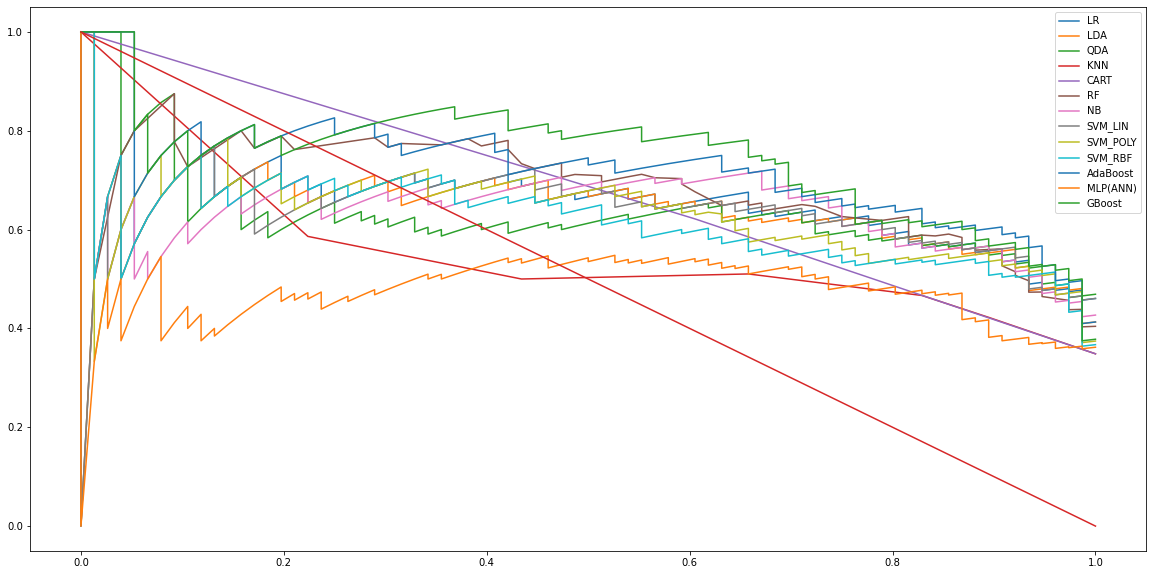

In [152]:
fig, ax = plt.subplots(figsize=(20, 10))
i=0
print("|Algorithme  |Accuracy    |FScore  |AUPRC   |")
for name, model in models:
    pred_prob = model.predict_proba(X_test)
    pred = model.predict(X_test)
    accuracy = (pred == y_test).sum()/len(X_test) * 100
    fscore = f1_score(y_test, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(y_test, pred_prob[:,1])

    print("| {:10} | {:10.2f} | {:.4F} | {:.4f} | {:.4f} | {:.4f}  |".format(name, accuracy, fscore, 
                                                                      auc(recall, precision), 
                                                                      recall_score(y_test, pred), 
                                                                      precision_score(y_test, pred))
         )
    #print(classification_report(Y_test_class, pred, target_names=["Non Vendue", "Vendue"], digits=4))

    ax.plot(recall, precision, label=name)

    i+=1
plt.plot([0,1], [1, 0])
plt.legend()

According to the testing results, the best performing model is XGBoost with a 78.90% Accuracy and a 77.41% F1 Score. 

## Constructing the Model (With Normalization)

### Normalize and Split the data

In [155]:
test_part = 0.3
X_norm = (X-X.mean())/X.std()
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=test_part)

### Applying SMOTE Upsampling

In [156]:
s = SMOTE()
X_train_smote, y_train_smote = s.fit_resample(X_train, y_train)

### Model Selection (CV with F1 Score)

In [157]:
num_folds = 10
seed = 7
scoring = 'f1'
models = []

models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('QDA', QuadraticDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM_LIN', SVC(kernel="linear", probability=True)))
models.append(('SVM_POLY', SVC(kernel="poly", probability=True)))
models.append(('SVM_RBF', SVC(kernel="rbf", probability=True)))
models.append(('AdaBoost', AdaBoostClassifier(n_estimators=100)))
models.append(('MLP(ANN)', MLPClassifier(max_iter=300)))
models.append(('GBoost', GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)))

results = []
names = []
for name, model in models:
	kfold = KFold(n_splits=num_folds, shuffle=True)
	cv_results = cross_val_score(model, X_train_smote, y_train_smote, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.746339 (0.046621)
LDA: 0.724194 (0.077487)
QDA: 0.718141 (0.060408)
KNN: 0.788390 (0.066819)
CART: 0.756028 (0.047241)
RF: 0.833233 (0.033524)
NB: 0.719860 (0.059137)
SVM_LIN: 0.726973 (0.060428)
SVM_POLY: 0.692733 (0.081976)
SVM_RBF: 0.781587 (0.063984)
AdaBoost: 0.767187 (0.062706)
MLP(ANN): 0.802219 (0.035730)
GBoost: 0.785440 (0.040320)


### Training the Models

In [158]:
import time
print("|Algorithm   |Exec. Time   |")
for name, model in models:
    START_TIME = time.time()
    model.fit(X_train_smote, y_train_smote)
    END_TIME = time.time()
    print("| {:10} | {:10.4f}s |".format(name, END_TIME-START_TIME))


|Algorithm   |Exec. Time   |
| LR         |     0.0100s |
| LDA        |     0.0050s |
| QDA        |     0.0043s |
| KNN        |     0.0050s |
| CART       |     0.0070s |
| RF         |     0.3228s |
| NB         |     0.0030s |
| SVM_LIN    |     0.0838s |
| SVM_POLY   |     0.0848s |
| SVM_RBF    |     0.1276s |
| AdaBoost   |     0.2374s |
| MLP(ANN)   |     1.5752s |
| GBoost     |     0.1167s |


### Testing

|Algorithme  |Accuracy    |FScore  |AUPRC   |
| LR         |      78.44 | 0.7634 | 0.7421 | 0.7067 | 0.6795  |
| LDA        |      78.44 | 0.7619 | 0.7357 | 0.6933 | 0.6842  |
| QDA        |      75.23 | 0.7273 | 0.7121 | 0.6533 | 0.6364  |
| KNN        |      72.94 | 0.7137 | 0.6713 | 0.7200 | 0.5870  |
| CART       |      72.02 | 0.6870 | 0.6587 | 0.5733 | 0.5972  |
| RF         |      77.06 | 0.7505 | 0.7164 | 0.7067 | 0.6543  |
| NB         |      76.15 | 0.7374 | 0.6841 | 0.6667 | 0.6494  |
| SVM_LIN    |      77.06 | 0.7475 | 0.7345 | 0.6800 | 0.6623  |
| SVM_POLY   |      75.23 | 0.7137 | 0.6595 | 0.5600 | 0.6667  |
| SVM_RBF    |      77.06 | 0.7579 | 0.7284 | 0.7867 | 0.6344  |
| AdaBoost   |      75.23 | 0.7273 | 0.6504 | 0.6533 | 0.6364  |
| MLP(ANN)   |      76.15 | 0.7446 | 0.7387 | 0.7333 | 0.6322  |
| GBoost     |      74.77 | 0.7247 | 0.7372 | 0.6667 | 0.6250  |


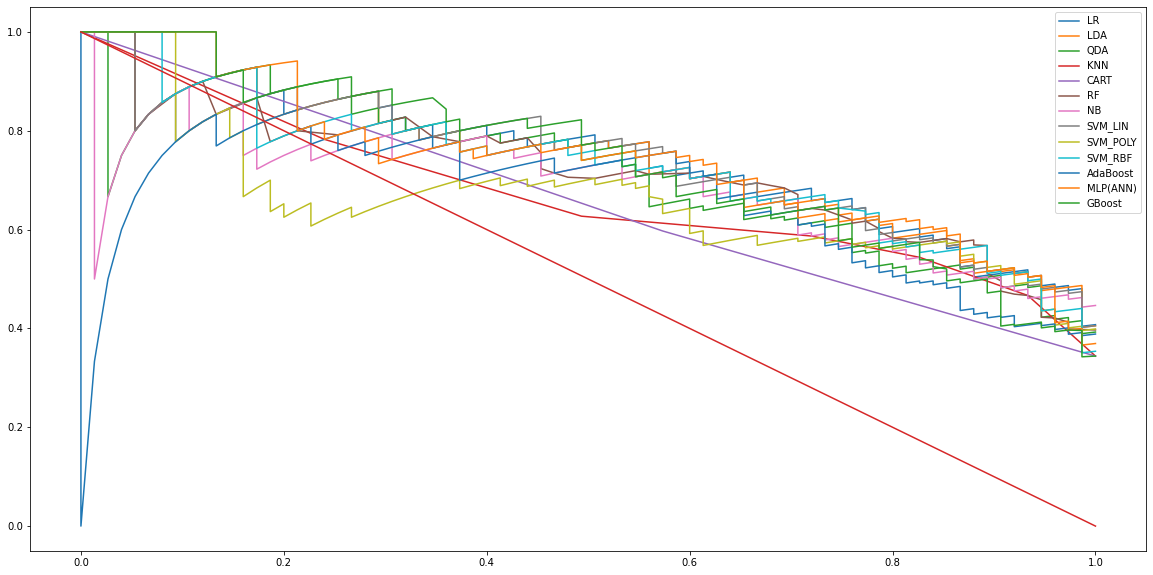

In [159]:
fig, ax = plt.subplots(figsize=(20, 10))
i=0
print("|Algorithm   |Accuracy    |FScore  |AUPRC   |")
for name, model in models:
    pred_prob = model.predict_proba(X_test)
    pred = model.predict(X_test)
    accuracy = (pred == y_test).sum()/len(X_test) * 100
    fscore = f1_score(y_test, pred, average='macro')
    precision, recall, thresholds = precision_recall_curve(y_test, pred_prob[:,1])

    print("| {:10} | {:10.2f} | {:.4F} | {:.4f} | {:.4f} | {:.4f}  |".format(name, accuracy, fscore, 
                                                                      auc(recall, precision), 
                                                                      recall_score(y_test, pred), 
                                                                      precision_score(y_test, pred))
         )
    #print(classification_report(Y_test_class, pred, target_names=["Non Vendue", "Vendue"], digits=4))

    ax.plot(recall, precision, label=name)

    i+=1
plt.plot([0,1], [1, 0])
plt.legend()
plt.show()

When comparing the PR Curves, we can see that normalizing allows better performance, indeed, we can see that the curves have a much greater area under them, than in the unnormalized case.

According to the testing results, the best performing model seem to be Linear Regression with 78.44% accuracy and a 76.34% F1 Score.

## Majority Vote Model
In this part we'll create a model that uses all of the previously trained model, executes a prediction on each, then proceeds to a vote. The majority wins the vote.

We'll test this model's accuracy as opposed to the models on their own.

### Constructing the Model

In [180]:
def predict_majority(models, X_test, proba_mode=False):
    preds = []
    for model in models:
        if proba_mode:
            pred = model[1].predict_proba(X_test)
        else:
            pred = model[1].predict(X_test)
        preds.append(pred)
    preds = np.array(preds)
    if not proba_mode:
        return (preds.mean(axis=0)>0.5).astype("int")
    else:
        return preds.mean(axis=0)

predict_majority(models, X_test)

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0])

### Evaluating the Model
In this part, we'll evaluate our Majority vote model according to the best performing model composing it (Logistic Regression).

|Algorithm      |Accuracy    |FScore  |AUPRC   |Recall  |Precision|
| Majority Vote |      78.44 | 0.7634 | 0.7553 | 0.7067 | 0.6795  |
| Logistic Reg. |      78.44 | 0.7634 | 0.7421 | 0.7067 | 0.6795  |


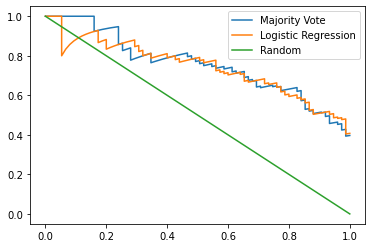

In [218]:
pred = predict_majority(models, X_test)
pred_prob = predict_majority(models, X_test, proba_mode=True)

accuracy = (pred == y_test).sum()/len(X_test) * 100
fscore = f1_score(y_test, pred, average='macro')
precision, recall, thresholds = precision_recall_curve(y_test, pred_prob[:,1])
print("|Algorithm      |Accuracy    |FScore  |AUPRC   |Recall  |Precision|")
print("| {:10} | {:10.2f} | {:.4F} | {:.4f} | {:.4f} | {:.4f}  |".format("Majority Vote", accuracy, fscore, 
                                                                      auc(recall, precision), 
                                                                      recall_score(y_test, pred), 
                                                                      precision_score(y_test, pred))
     )


# plotting previous best performing model with it for comparison
pred = models[0][1].predict(X_test)
pred_prob = models[0][1].predict_proba(X_test)
accuracy = (pred == y_test).sum()/len(X_test) * 100
fscore = f1_score(y_test, pred, average='macro')
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, pred_prob[:,1])

print("| {:10} | {:10.2f} | {:.4F} | {:.4f} | {:.4f} | {:.4f}  |".format("Logistic Reg.", accuracy, fscore, 
                                                                      auc(recall_lr, precision_lr), 
                                                                      recall_score(y_test, pred), 
                                                                      precision_score(y_test, pred))
     )


plt.plot(recall, precision, label="Majority Vote")
plt.plot(recall_lr, precision_lr, label="Logistic Regression")
plt.plot([0,1], [1, 0], label="Random")
plt.legend()
plt.show()

We can see that the method performs as good as the best performing model (Logistic Regression). Nonetheless, we can see a small improvement in the AUPRC.

### Accuracy and F1 Score according to treshold

In this part we try many different values to the decision threshold (proba > threshold => class 1 / else class 0). And we'll see how this affects the accuracy and the f1 score of our majority vote model.

In [208]:
results_acc = []
results_f1 = []
th_range = np.arange(0.01,1, 0.01)
for threshold in th_range:
    pred_prob_discr = (predict_majority(models, X_test, proba_mode=True)[:,1]>threshold).astype("int")
    results_acc.append((pred_prob_discr == y_test).sum()/len(X_test) * 100)
    results_f1.append(f1_score(y_test, pred_prob_discr, average='macro') * 100)


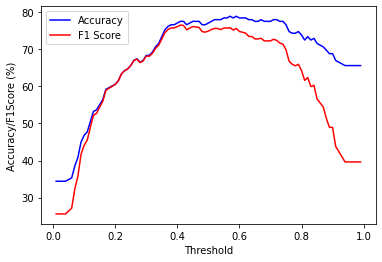

In [209]:
plt.plot(th_range, results_acc, color="blue", label="Accuracy")
plt.plot(th_range, results_f1, color="red", label="F1 Score")
plt.xlabel("Threshold")
plt.ylabel("Accuracy/F1Score (%)")
plt.legend()
plt.show()